In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameter
batch_size = 64
img_height = 48
img_width = 48
channel_n = 1

In [3]:
# Train & Validation dataset dir path
train_data_dir = "./dataset/train"
validation_data_dir = "./dataset/test"

In [4]:
# Get train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="training",
    seed=2020,
    image_size=(img_height, img_height),
    color_mode="grayscale",
    batch_size=batch_size
)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [5]:
# Get validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=2020,
    image_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size
)

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


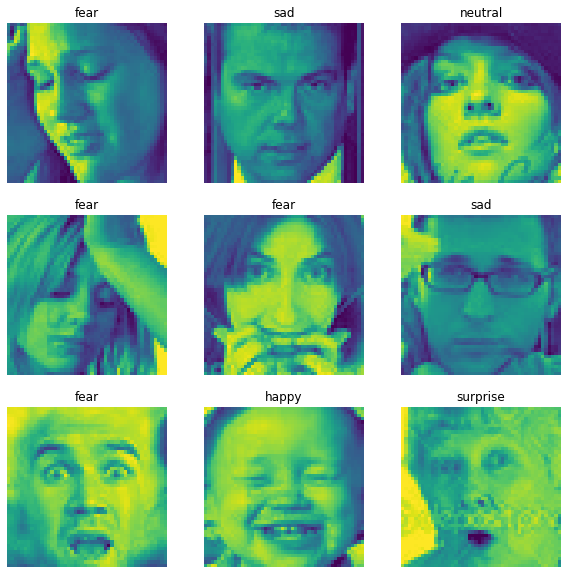

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8").squeeze())
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [20]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 48, 48, 1)
(64,)


In [21]:
from tensorflow.keras import layers

In [22]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [23]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0.0 0.9843138


In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)